In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Make the original data
series = np.sin((0.1 * np.arange(400))**2)

# ^2 means that the period changes over time

Time series of form:
x(t) = sin(wt^2)


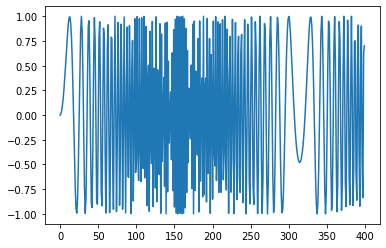

In [4]:
# Plot
plt.plot(series)
plt.show()

In [6]:
# Build the supervised learning dataset
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t: t+T]
  X.append(x)

  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # Making it NxT
Y = np.array(Y)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [7]:
# Autoregressive linear model (DEFAULT RNN)
i = Input(shape=(T, ))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.01))

# Train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
7/7 [==============================] - 1s 27ms/step - loss: 1.0614 - val_loss: 0.8300
Epoch 2/80
7/7 [==============================] - 0s 5ms/step - loss: 0.9235 - val_loss: 0.7427
Epoch 3/80
7/7 [==============================] - 0s 7ms/step - loss: 0.8244 - val_loss: 0.6858
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 0.7444 - val_loss: 0.6516
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6820 - val_loss: 0.6267
Epoch 6/80
7/7 [==============================] - 0s 5ms/step - loss: 0.6327 - val_loss: 0.5964
Epoch 7/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5938 - val_loss: 0.5830
Epoch 8/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5628 - val_loss: 0.5776
Epoch 9/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5412 - val_loss: 0.5789
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5268 - val_loss: 0.5790
Epoch 11/80
7/7 [=====================

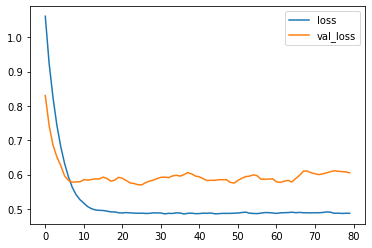

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


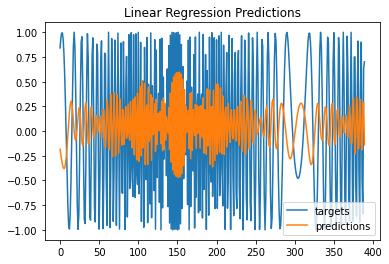

In [9]:
# One-step forecast (short way of doing things)
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

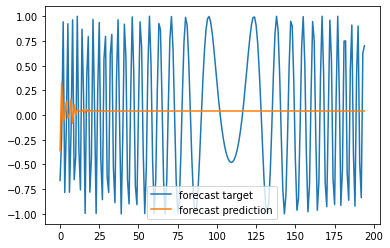

In [10]:
# Fails badly
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [11]:
# Next trying the RNN/LSTM Model
X = X.reshape(-1, T, 1) # make it N x T x D

# Make the RNN
i = Input(shape=(T, D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.05))

# Train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
7/7 [==============================] - 1s 38ms/step - loss: 0.5809 - val_loss: 0.5868
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 0.4852 - val_loss: 0.5942
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 0.4619 - val_loss: 0.5525
Epoch 4/80
7/7 [==============================] - 0s 8ms/step - loss: 0.4036 - val_loss: 0.4726
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.3856 - val_loss: 0.4153
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 0.3397 - val_loss: 0.3575
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 0.2556 - val_loss: 0.3772
Epoch 8/80
7/7 [==============================] - 0s 7ms/step - loss: 0.1707 - val_loss: 0.2303
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.0910 - val_loss: 0.2205
Epoch 10/80
7/7 [==============================] - 0s 9ms/step - loss: 0.1072 - val_loss: 0.1386
Epoch 11/80
7/7 [=====================

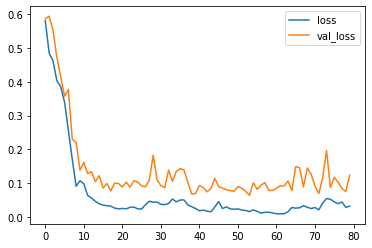

In [12]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


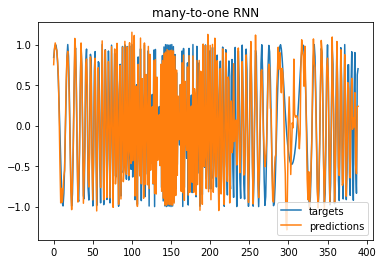

In [13]:
# One-step forecast (short way of doing things)
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

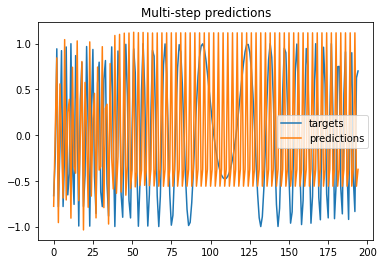

In [17]:
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # X = X.reshape(-1, T, 1) # make it N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0, 0]
  forecast.append(f)

  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='predictions')
plt.title("Multi-step predictions")
plt.legend()
plt.show()

# 

In [18]:
# LSTM

# Next trying the RNN/LSTM Model
X = X.reshape(-1, T, 1) # make it N x T x D

# Make the LSTM
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.05))

# Train the LSTM
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

# LSTMs are better at finding long term dependencies

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
7/7 [==============================] - 2s 81ms/step - loss: 0.5355 - val_loss: 0.5943
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.5202 - val_loss: 0.6056
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.4754 - val_loss: 0.5525
Epoch 4/80
7/7 [==============================] - 0s 13ms/step - loss: 0.4315 - val_loss: 0.5689
Epoch 5/80
7/7 [==============================] - 0s 12ms/step - loss: 0.4089 - val_loss: 0.5447
Epoch 6/80
7/7 [==============================] - 0s 11ms/step - loss: 0.3713 - val_loss: 0.5497
Epoch 7/80
7/7 [==============================] - 0s 11ms/step - loss: 0.3322 - val_loss: 0.3853
Epoch 8/80
7/7 [==============================] - 0s 11ms/step - loss: 0.2624 - val_loss: 0.3248
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.1984 - val_loss: 0.3205
Epoch 10/80
7/7 [==============================] - 0s 11ms/step - loss: 0.1376 - val_loss: 0.1363
Epoch 11/80
7/7 [============

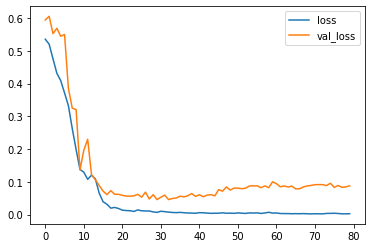

In [19]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


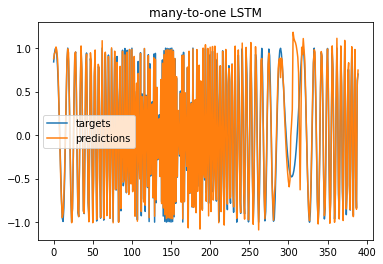

In [21]:
# One-step forecast (short way of doing things)
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one LSTM")
plt.legend()
plt.show()